#Data Collection Using Quantrocket

In [ ]:
from quantrocket.license import set_license
set_license('f116ff0d-ddf0-11ee-b05b-8b9fa8f82e74')

{'licensekey': 'f116........2e74', 'software_license': {}}

In [ ]:
from quantrocket.master import collect_usstock_listings
collect_usstock_listings()

{'status': 'success', 'msg': 'successfully loaded FREE stock listings'}

In [ ]:
from quantrocket.master import get_securities
securities = get_securities(symbols='AAPL', fields=['Sid','Symbol','Exchange'], vendors='usstock')
securities

,Symbol,Exchange
Sid,,
FIBBG000B9XRY4,AAPL,XNAS


In [ ]:
aapl = securities.index[0]
aapl #aapl security id

'FIBBG000B9XRY4'

In [ ]:
from quantrocket.zipline import create_usstock_bundle
create_usstock_bundle("usstock-free-1min", free=True)

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/zipline/bundles/usstock-free-1min?ingest_type=usstock&free=True', {'status': 'error', 'msg': 'bundle usstock-free-1min already exists'})

In [ ]:
from quantrocket.zipline import ingest_bundle
ingest_bundle("usstock-free-1min")

{'status': 'the data will be ingested asynchronously'}

In [ ]:
from quantrocket import get_prices
data = get_prices("usstock-free-1min", data_frequency='daily', sids=aapl, start_date='2023-01-01', end_date='2023-12-31', fields="Close")

In [ ]:
data

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03         124.375
      2023-01-04         125.658
      2023-01-05         124.325
      2023-01-06         128.900
      2023-01-09         129.427
...                          ...
      2023-12-22         193.600
      2023-12-26         193.050
      2023-12-27         193.150
      2023-12-28         193.580
      2023-12-29         192.530

[250 rows x 1 columns]

In [120]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install ta
!pip install plotly
!pip install pmdarima
!pip install nixtlats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.6 MB ? eta -:--:--
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=371acbbc01dd92304d019d18191dfccae88381171212652214e6c9a86a6b2e55
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


#Importing Libraries

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from scipy import stats
from prophet import Prophet
import plotly.express as px
import statsmodels.api as sm
from datetime import datetime
from nixtlats import TimeGPT
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels import regression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Data Preprocessing

In [ ]:
data.to_csv('aapl_data.csv')

In [ ]:
data.head()

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03         124.375
      2023-01-04         125.658
      2023-01-05         124.325
      2023-01-06         128.900
      2023-01-09         129.427

In [ ]:
data['FIBBG000B9XRY4']

Field  Date      
Close  2023-01-03    124.375
       2023-01-04    125.658
       2023-01-05    124.325
       2023-01-06    128.900
       2023-01-09    129.427
                      ...   
       2023-12-22    193.600
       2023-12-26    193.050
       2023-12-27    193.150
       2023-12-28    193.580
       2023-12-29    192.530
Name: FIBBG000B9XRY4, Length: 250, dtype: float64

In [ ]:
data = data.rename(columns = {'FIBBG000B9XRY4':'Close'})

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data

Sid                 Close
Field Date               
Close 2023-01-03  124.375
      2023-01-04  125.658
      2023-01-05  124.325
      2023-01-06  128.900
      2023-01-09  129.427
...                   ...
      2023-12-22  193.600
      2023-12-26  193.050
      2023-12-27  193.150
      2023-12-28  193.580
      2023-12-29  192.530

[250 rows x 1 columns]

In [ ]:
data.columns

Index(['Close'], dtype='object', name='Sid')

In [ ]:
data = data.reset_index()

In [ ]:
data

Sid,Field,Date,Close
0,Close,2023-01-03,124.375
1,Close,2023-01-04,125.658
2,Close,2023-01-05,124.325
3,Close,2023-01-06,128.900
4,Close,2023-01-09,129.427
...,...,...,...
245,Close,2023-12-22,193.600
246,Close,2023-12-26,193.050
247,Close,2023-12-27,193.150
248,Close,2023-12-28,193.580


In [ ]:
data.columns = ['Sid', 'Date', 'Close']

In [ ]:
data = data.drop('Sid',axis = 1)

In [ ]:
data

,Unnamed: 0,Date,Close
0,0,2023-01-03,124.375
1,1,2023-01-04,125.658
2,2,2023-01-05,124.325
3,3,2023-01-06,128.900
4,4,2023-01-09,129.427
...,...,...,...
245,245,2023-12-22,193.600
246,246,2023-12-26,193.050
247,247,2023-12-27,193.150
248,248,2023-12-28,193.580


#Data Manipulation


In [213]:
X = data['Close']

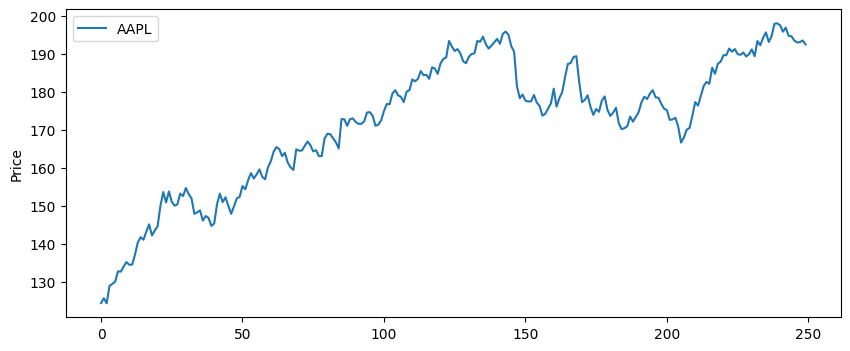

In [214]:
plt.figure(figsize=(10, 4))
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['AAPL']);

In [215]:
np.mean(X)

172.121068

In [216]:
np.std(X)

17.469061436934037

Calculating Returns

In [217]:
returns = X.pct_change()[1:]  #pct_change is a function to get the returns
returns

1      0.010316
2     -0.010608
3      0.036799
4      0.004088
5      0.004450
         ...   
245   -0.005548
246   -0.002841
247    0.000518
248    0.002226
249   -0.005424
Name: Close, Length: 249, dtype: float64

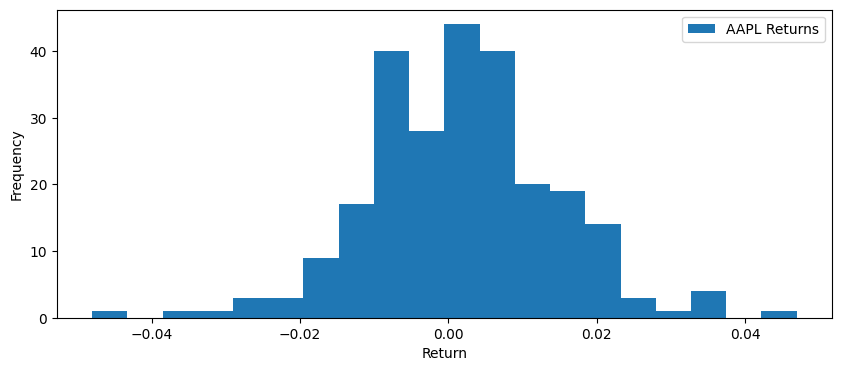

In [218]:
plt.figure(figsize=(10, 4))
plt.hist(returns,bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AAPL Returns']);

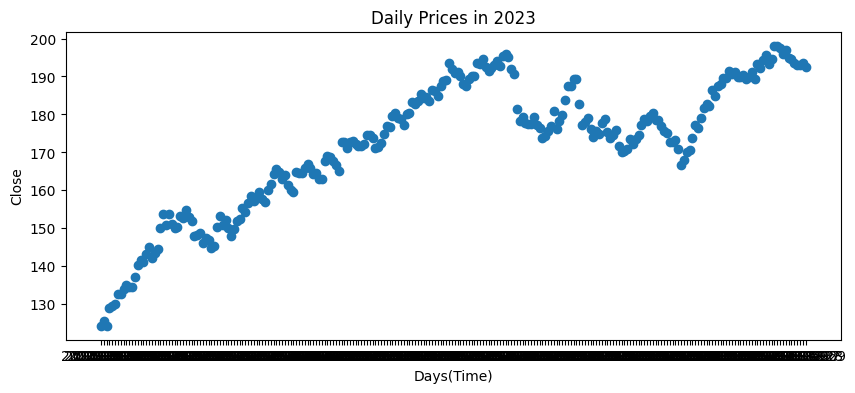

In [219]:
plt.figure(figsize=(10, 4))
plt.scatter(data['Date'],data['Close'])
plt.xlabel('Days(Time)')
plt.ylabel('Close')
plt.title('Daily Prices in 2023');

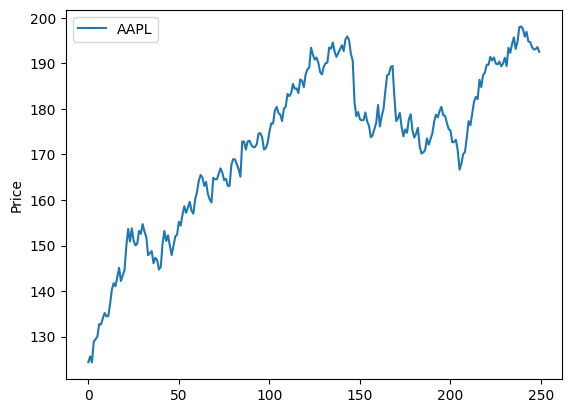

In [220]:
plt.plot(data['Close'])
plt.ylabel('Price')
plt.legend(['AAPL']);

In [221]:
np.mean(returns)

0.0018349196803809837

In [222]:
np.std(returns)

0.0125446784536124

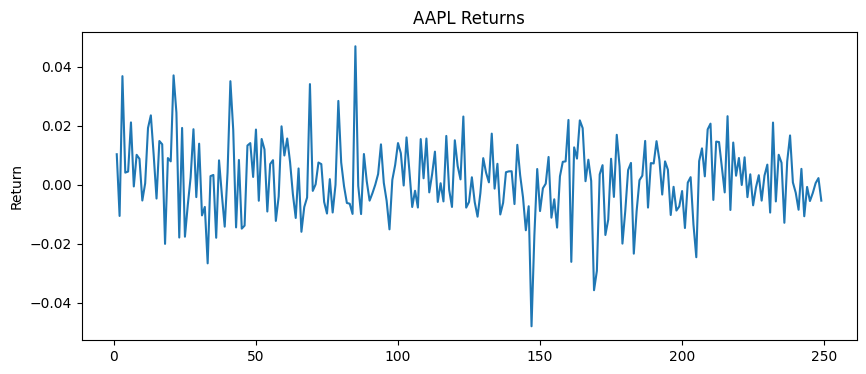

In [224]:
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.ylabel('Return')
plt.title('AAPL Returns');

Skew: 0.011769269607075403
Mean: 0.0018349196803809837
Median: 0.0018800995418397637


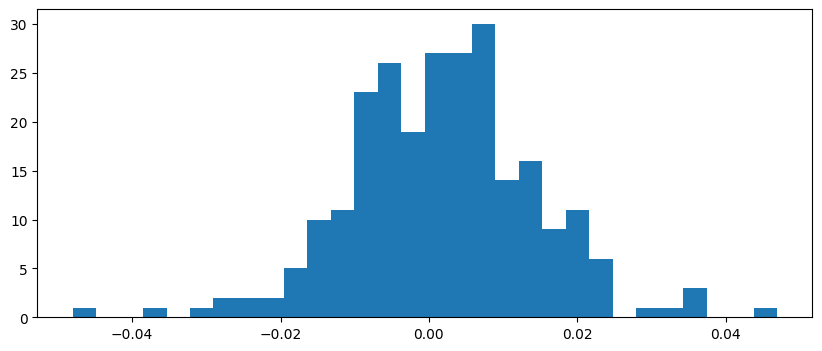

In [225]:
print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))
plt.figure(figsize=(10, 4))
plt.hist(returns, 30);

Text(0, 0.5, '60-day Rolling Correlation')

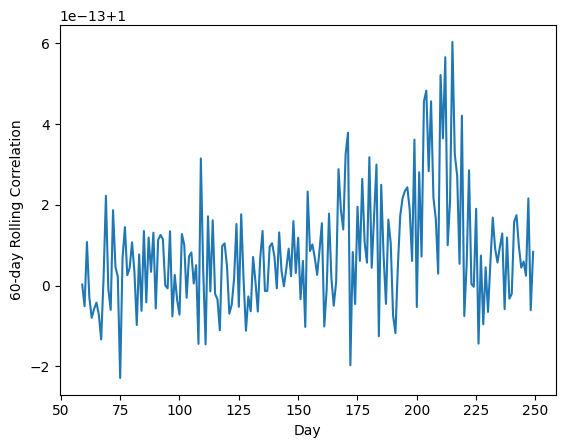

In [226]:
rolling_correlation = data['Close'].rolling(60).corr(data['Close'])
ax = rolling_correlation.plot()
ax.set_xlabel('Day')
ax.set_ylabel('60-day Rolling Correlation')

In [424]:
rolling_avg = data['Close'].rolling(window=30).mean()

trace1 = go.Scatter(x=data.index, y=data['Close'], mode='lines', name='AAPL Stocks Data')
trace2 = go.Scatter(x=data.index, y=rolling_avg, mode='lines', name='30-day Moving Average', line=dict(dash='dash', color='red'))

# Create layout
layout = go.Layout(title='AAPL Stocks Data with Moving Average',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Close Price'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# Create figure and plot
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


#RSI Indicator

RSI is a technical momentum indicator. It measures the speed and magnitude of an asset’s recent price changes. This helps traders identify assets that are potentially overbought meaning they are trading above their true value or oversold

In [228]:
Date_Close = {}
for i in range(len(data['Date'])):
  Date_Close[data['Date'][i]] = data['Close'][i]
Date_Close

{'2023-01-03': 124.375,
 '2023-01-04': 125.658,
 '2023-01-05': 124.325,
 '2023-01-06': 128.9,
 '2023-01-09': 129.427,
 '2023-01-10': 130.003,
 '2023-01-11': 132.748,
 '2023-01-12': 132.668,
 '2023-01-13': 134.011,
 '2023-01-17': 135.184,
 '2023-01-18': 134.458,
 '2023-01-19': 134.518,
 '2023-01-20': 137.104,
 '2023-01-23': 140.326,
 '2023-01-24': 141.738,
 '2023-01-25': 141.071,
 '2023-01-26': 143.16,
 '2023-01-27': 145.119,
 '2023-01-30': 142.205,
 '2023-01-31': 143.488,
 '2023-02-01': 144.622,
 '2023-02-02': 149.982,
 '2023-02-03': 153.641,
 '2023-02-06': 150.887,
 '2023-02-07': 153.79,
 '2023-02-08': 151.076,
 '2023-02-09': 150.031,
 '2023-02-10': 150.4,
 '2023-02-13': 153.228,
 '2023-02-14': 152.581,
 '2023-02-15': 154.702,
 '2023-02-16': 153.089,
 '2023-02-17': 151.934,
 '2023-02-21': 147.88,
 '2023-02-22': 148.308,
 '2023-02-23': 148.796,
 '2023-02-24': 146.117,
 '2023-02-27': 147.322,
 '2023-02-28': 146.814,
 '2023-03-01': 144.723,
 '2023-03-02': 145.321,
 '2023-03-03': 150.42,


Change in price = (Current closing price - Previous closing price) = (285.48 - 280.6) = 4.79

In [229]:
Change = []
for i in range(1,len(data['Date'])):
  cur_value = data['Close'][i]
  prev_value = data['Close'][i-1]
  diff = cur_value - prev_value
  if(i-1 == 0):
    Change.append(0)
  Change.append(round(diff,3))
Change

[0,
 1.283,
 -1.333,
 4.575,
 0.527,
 0.576,
 2.745,
 -0.08,
 1.343,
 1.173,
 -0.726,
 0.06,
 2.586,
 3.222,
 1.412,
 -0.667,
 2.089,
 1.959,
 -2.914,
 1.283,
 1.134,
 5.36,
 3.659,
 -2.754,
 2.903,
 -2.714,
 -1.045,
 0.369,
 2.828,
 -0.647,
 2.121,
 -1.613,
 -1.155,
 -4.054,
 0.428,
 0.488,
 -2.679,
 1.205,
 -0.508,
 -2.091,
 0.598,
 5.099,
 2.789,
 -2.221,
 1.264,
 -2.27,
 -2.082,
 1.962,
 2.112,
 0.398,
 2.848,
 -0.846,
 2.39,
 1.872,
 -1.444,
 1.096,
 1.315,
 -1.962,
 -0.628,
 3.107,
 1.584,
 2.53,
 1.265,
 -0.538,
 -1.863,
 0.897,
 -2.62,
 -1.225,
 -0.697,
 5.438,
 -0.348,
 0.019,
 1.235,
 1.156,
 -0.976,
 -1.624,
 0.309,
 -1.554,
 -0.01,
 4.632,
 1.264,
 -0.089,
 -1.046,
 -1.086,
 -1.653,
 7.749,
 -0.07,
 -1.723,
 1.778,
 0.194,
 -0.937,
 -0.499,
 0.0,
 0.618,
 2.354,
 0.11,
 -0.958,
 -2.633,
 0.279,
 1.147,
 2.434,
 1.865,
 -0.05,
 2.833,
 0.857,
 -1.366,
 -0.369,
 -1.386,
 2.742,
 0.389,
 2.823,
 -0.479,
 0.638,
 2.055,
 -1.087,
 0.089,
 -1.047,
 3.032,
 -0.319,
 -1.406,
 2.782

In [230]:
Date = list(data['Date'])
Close = list(data['Close'])

In [231]:
Gain = []
Loss = []
for i in range(len(Change)):
  if(Change[i] < 0):
    Gain.append(float(0.00))
    Loss.append(abs(Change[i]))
  elif Change[i] == 0:
    Gain.append(float(0.00))
    Loss.append(float(0.00))
  else:
    Gain.append(abs(Change[i]))
    Loss.append(float(0.00))
Gain

[0.0,
 1.283,
 0.0,
 4.575,
 0.527,
 0.576,
 2.745,
 0.0,
 1.343,
 1.173,
 0.0,
 0.06,
 2.586,
 3.222,
 1.412,
 0.0,
 2.089,
 1.959,
 0.0,
 1.283,
 1.134,
 5.36,
 3.659,
 0.0,
 2.903,
 0.0,
 0.0,
 0.369,
 2.828,
 0.0,
 2.121,
 0.0,
 0.0,
 0.0,
 0.428,
 0.488,
 0.0,
 1.205,
 0.0,
 0.0,
 0.598,
 5.099,
 2.789,
 0.0,
 1.264,
 0.0,
 0.0,
 1.962,
 2.112,
 0.398,
 2.848,
 0.0,
 2.39,
 1.872,
 0.0,
 1.096,
 1.315,
 0.0,
 0.0,
 3.107,
 1.584,
 2.53,
 1.265,
 0.0,
 0.0,
 0.897,
 0.0,
 0.0,
 0.0,
 5.438,
 0.0,
 0.019,
 1.235,
 1.156,
 0.0,
 0.0,
 0.309,
 0.0,
 0.0,
 4.632,
 1.264,
 0.0,
 0.0,
 0.0,
 0.0,
 7.749,
 0.0,
 0.0,
 1.778,
 0.194,
 0.0,
 0.0,
 0.0,
 0.618,
 2.354,
 0.11,
 0.0,
 0.0,
 0.279,
 1.147,
 2.434,
 1.865,
 0.0,
 2.833,
 0.857,
 0.0,
 0.0,
 0.0,
 2.742,
 0.389,
 2.823,
 0.0,
 0.638,
 2.055,
 0.0,
 0.089,
 0.0,
 3.032,
 0.0,
 0.0,
 2.782,
 1.187,
 0.339,
 4.369,
 0.0,
 0.0,
 0.478,
 0.0,
 0.0,
 0.0,
 1.686,
 0.768,
 0.149,
 3.292,
 0.0,
 1.367,
 0.0,
 0.0,
 0.808,
 0.867,
 0.878,

In [232]:
#Average (0.00 + 4.79 + 8.60 + 0.00 + 6.02 + 1.23 + 0.00 + 9.64 + 8.68 + 0.00 + 4.88 + 0.00 + 0.00 + 0.00)/14 = 3.13.

Calculating Average Gain and Average Loss

In [233]:
Avg_gain = []
Avg_loss = []
for i in range(14):
  Avg_gain.append(0)
  Avg_loss.append(0)

for i in range(len(Gain)-14):
  sum = 0
  for j in range(i,i+14):
    sum += Gain[j]
  Avg_gain.append(round((sum/14),3))

for i in range(len(Loss)-14):
  sum = 0
  for j in range(i,i+13):
    sum += Loss[j]
  Avg_loss.append(round((sum/14),3))

In [234]:
#Calculating the Relative Strength RS = (Avg Gain)/(Avg Loss) = 3.13/2.52 = 1.24.

Calculating the Relative Strength RS = (Avg Gain)/(Avg Loss) = 3.13/2.52 = 1.24.

In [235]:
RS = []
m = len(Avg_gain)
for i in range(m):
  if Avg_gain[i] == 0 and Avg_loss[i] == 0:
    RS.append(0)
  elif Avg_loss[i] == 0:
    RS.append(0)
  else:
    k = Avg_gain[i] / Avg_loss[i]
    RS.append(round(k,3))
#RS

In [236]:
#Calculating Relative Strength Index RSI = [100 - (100/{1+ RS})]

Calculating Relative Strength Index RSI = [100 - (100/{1+ RS})]

In [237]:
RSI = []
for i in range(len(RS)):
  if RS[i] == 0:
    RSI.append(0)
  elif RS[i] != 0:
    p = 1 + RS[i]
    q = 100/p
    R = 100 - q
    RSI.append(round(q,3))
#RSI

In [238]:
print("len_Date:",len(Date))
print("len_Close:",len(Close))
print("len_Gain:",len(Gain))
print("len_Loss:",len(Loss))
print("len_Avg_Gain:",len(Avg_gain))
print("len_Avg_Loss:",len(Avg_loss))
print("len_RS:",len(RS))

len_Date: 250
len_Close: 250
len_Gain: 250
len_Loss: 250
len_Avg_Gain: 250
len_Avg_Loss: 250
len_RS: 250


In [239]:
Dict = {'Date': Date,'Close': Close,'Gain': Gain,'Loss': Loss,'Avg_Gain':Avg_gain,'Avg_loss':Avg_loss,'RS':RS,'RSI':RSI}
Data_Frame = pd.DataFrame(Dict)
Data_Frame

,Date,Close,Gain,Loss,Avg_Gain,Avg_loss,RS,RSI
0,2023-01-03,124.375,0.000,0.000,0.000,0.000,0.000,0.000
1,2023-01-04,125.658,1.283,0.000,0.000,0.000,0.000,0.000
2,2023-01-05,124.325,0.000,1.333,0.000,0.000,0.000,0.000
3,2023-01-06,128.900,4.575,0.000,0.000,0.000,0.000,0.000
4,2023-01-09,129.427,0.527,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
245,2023-12-22,193.600,0.000,1.080,0.954,0.698,1.367,42.248
246,2023-12-26,193.050,0.000,0.550,0.954,0.579,1.648,37.764
247,2023-12-27,193.150,0.100,0.000,0.669,0.656,1.020,49.505
248,2023-12-28,193.580,0.430,0.000,0.676,0.617,1.096,47.710


In [240]:
fig = px.line(Data_Frame, x = 'Date', y = 'Close',title = 'SPY Exchange Traded Fund ETF')
display(fig)

In [241]:
overbought = 70
oversold = 30

In [242]:
fig_RSI = px.line(Data_Frame, x = 'Date', y = 'RSI',title = 'RSI Indicator')
fig_RSI.add_hline(y=overbought,opacity = 0.5)
fig_RSI.add_hline(y=oversold,opacity = 0.5)
display(fig_RSI)

#MACD


In [243]:
def MACD(df):
  data['EMA12'] = data.Close.ewm(span = 12).mean()
  data['EMA26'] = data.Close.ewm(span = 26).mean()
  data['MACD'] = data.EMA12 - df.EMA26
  data['Signal'] = data.MACD.ewm(span = 9).mean()
  print('Indicator Added')

In [244]:
MACD(data)

Indicator Added


In [245]:
data

,Unnamed: 0,Date,Close,EMA12,EMA26,MACD,Signal
0,0,2023-01-03,124.375,124.375000,124.375000,0.000000,0.000000
1,1,2023-01-04,125.658,125.069958,125.041173,0.028785,0.015992
2,2,2023-01-05,124.325,124.779201,124.783859,-0.004658,0.007529
3,3,2023-01-06,128.900,126.079976,125.934552,0.145424,0.054241
4,4,2023-01-09,129.427,126.989351,126.744465,0.244885,0.110954
...,...,...,...,...,...,...,...
245,245,2023-12-22,193.600,194.737331,192.079319,2.658012,3.265813
246,246,2023-12-26,193.050,194.477742,192.151222,2.326520,3.077954
247,247,2023-12-27,193.150,194.273474,192.225205,2.048268,2.872017
248,248,2023-12-28,193.580,194.166785,192.325560,1.841225,2.665859


In [246]:
fig_Signal = px.line(data,x = 'Date',y = 'Signal',title = 'MACD INDICATOR')
fig_MACD = px.line(data,x = 'Date',y = 'MACD',title = 'MACD INDICATOR')

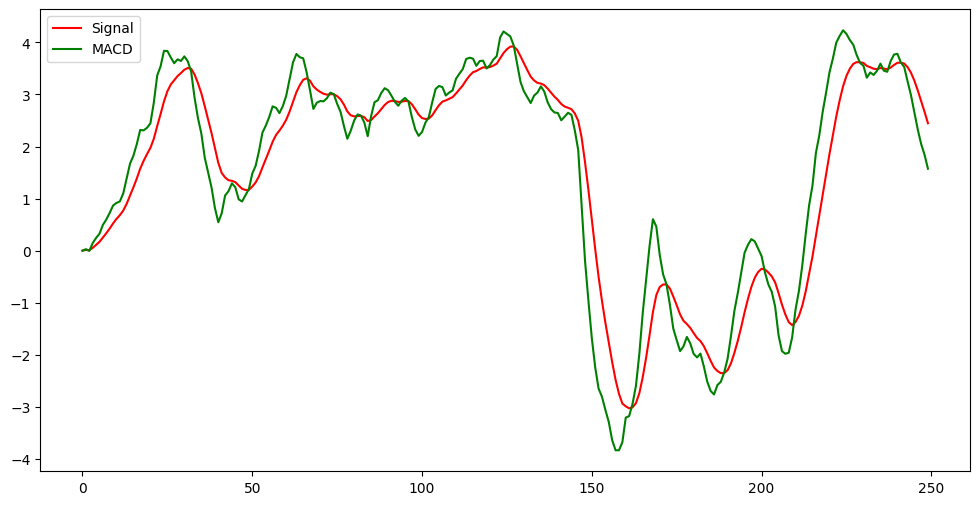

In [247]:
plt.figure(figsize=(12,6))
plt.plot(data.Signal, label = 'Signal', color = 'red')
plt.plot(data.MACD, label = 'MACD', color = 'green')
plt.legend()
plt.show()

In [248]:
Buy,Sell = [],[]
for i in range(2,len(data)):
  print(data.MACD.iloc[i])
  if data.MACD.iloc[i] > data.Signal.iloc[i] and data.MACD.iloc[i-1] < data.Signal.iloc[i-1]:
    Buy.append(i)
  elif data.MACD.iloc[i] < data.Signal.iloc[i] and data.MACD.iloc[i-1] > data.Signal.iloc[i-1]:
    Sell.append(i)

-0.004658120076456385
0.14542396785499534
0.24488533183065897
0.32470216728366097
0.4946497253023381
0.596846685273988
0.7251659999949425
0.8660623974506052
0.9170524914383691
0.9452554131170245
1.099710670067168
1.3877743244342753
1.6711012708903752
1.8246307540998998
2.048351695968421
2.3180544402649446
2.3101989363682947
2.359898091553731
2.4450372481732643
2.8413482385286954
3.3636065557773804
3.5402026844394925
3.837678316452781
3.8337058457572653
3.711741406109013
3.5997653408822714
3.6743958898457834
3.6430191242808405
3.7314286713780973
3.638607845260566
3.4384945545301093
2.9404941756649805
2.549177314526844
2.250427746145732
1.7884581703747244
1.497795682608455
1.2144440300713484
0.8189882577757999
0.5458614987076373
0.7177243839817606
1.0590312021189163
1.1425076926570625
1.2927004037020993
1.219297334265434
0.9859082615344903
0.9447557209701074
1.0666035257319209
1.1809641676977947
1.48006752467424
1.6310885019762225
1.9184052264650973
2.2687071090740005
2.403554775722057
2

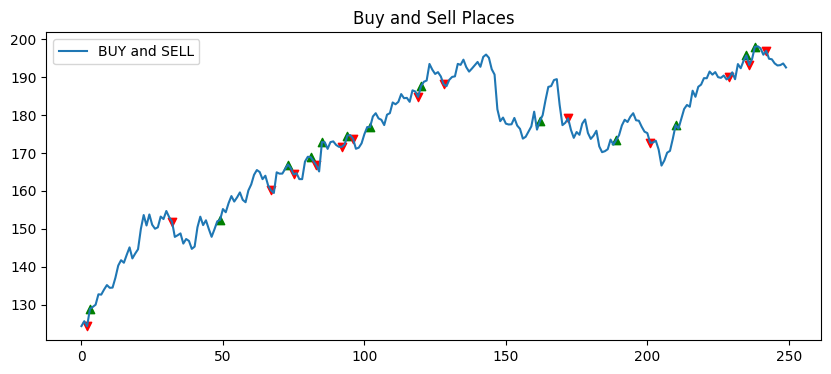

In [249]:
plt.figure(figsize = (10,4))
plt.scatter(data.iloc[Buy].index, data.iloc[Buy].Close,marker = '^', color='green')
plt.scatter(data.iloc[Sell].index, data.iloc[Sell].Close,marker = 'v', color='red')
plt.plot(data.Close, label = 'BUY and SELL')
plt.title("Buy and Sell Places")
plt.legend()
plt.show()

In [250]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.figure(figsize = (10,4))
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.248
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0727
Time:                        04:39:47   Log-Likelihood:                 738.55
No. Observations:                 249   AIC:                            -1473.
Df Residuals:                     247   BIC:                            -1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.002      2.720      0.007       0.001       0.007
x1         -1.988e-05    1.1e-05     -1.802      0.073   -4.16e-05    1.85e-06
==============================================================================
Omnibus:                        8.603   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               15.720
Skew:                          -0.060   Prob(JB):                     0.000386
Kurtosis:                       4.225   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

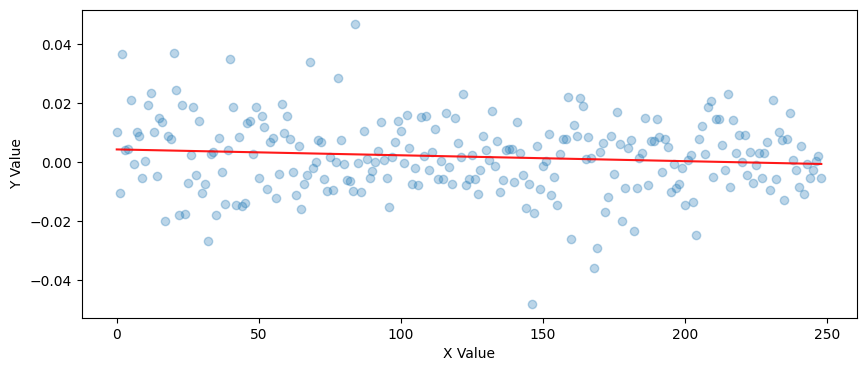

In [251]:
linreg(np.arange(len(returns)), returns.values)

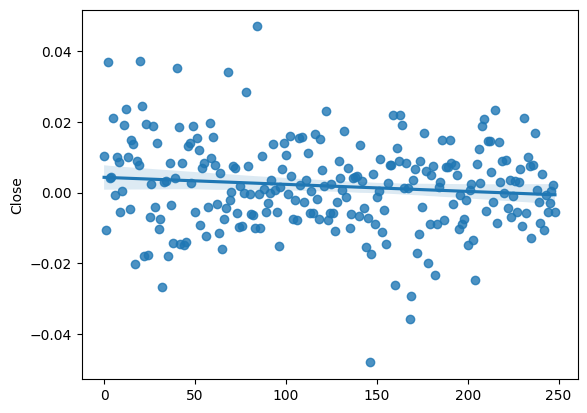

In [252]:
sns.regplot(x=np.arange(len(returns)), y=returns);

In [253]:
data

,Unnamed: 0,Date,Close,EMA12,EMA26,MACD,Signal
0,0,2023-01-03,124.375,124.375000,124.375000,0.000000,0.000000
1,1,2023-01-04,125.658,125.069958,125.041173,0.028785,0.015992
2,2,2023-01-05,124.325,124.779201,124.783859,-0.004658,0.007529
3,3,2023-01-06,128.900,126.079976,125.934552,0.145424,0.054241
4,4,2023-01-09,129.427,126.989351,126.744465,0.244885,0.110954
...,...,...,...,...,...,...,...
245,245,2023-12-22,193.600,194.737331,192.079319,2.658012,3.265813
246,246,2023-12-26,193.050,194.477742,192.151222,2.326520,3.077954
247,247,2023-12-27,193.150,194.273474,192.225205,2.048268,2.872017
248,248,2023-12-28,193.580,194.166785,192.325560,1.841225,2.665859


In [254]:
returns = X.pct_change()[0:]  #pct_change is a function to get the returns
returns.values

array([            nan,  1.03155779e-02, -1.06081587e-02,  3.67987131e-02,
        4.08844065e-03,  4.45038516e-03,  2.11148973e-02, -6.02645614e-04,
        1.01230138e-02,  8.75301281e-03, -5.37045804e-03,  4.46235999e-04,
        1.92241930e-02,  2.35004084e-02,  1.00622835e-02, -4.70586575e-03,
        1.48081463e-02,  1.36839899e-02, -2.00800722e-02,  9.02218628e-03,
        7.90309991e-03,  3.70621344e-02,  2.43962609e-02, -1.79249029e-02,
        1.92395634e-02, -1.76474413e-02, -6.91704837e-03,  2.45949171e-03,
        1.88031915e-02, -4.22246587e-03,  1.39008133e-02, -1.04264974e-02,
       -7.54463090e-03, -2.66826385e-02,  2.89423857e-03,  3.29044960e-03,
       -1.80045163e-02,  8.24681591e-03, -3.44822905e-03, -1.42425109e-02,
        4.13203154e-03,  3.50878400e-02,  1.85414174e-02, -1.44965374e-02,
        8.37152621e-03, -1.49094922e-02, -1.38816658e-02,  1.32657201e-02,
        1.40929655e-02,  2.61886902e-03,  1.86910981e-02, -5.45032857e-03,
        1.54818817e-02,  

#Model

In [419]:
class Model():
  #Calculating Returns
  def Returns(self, prices):
    returns = [0]  # No return for the first day
    returns += [(prices[i] - prices[i-1]) / prices[i-1] for i in range(1, len(prices))]
    return returns

  #Classifying the states
  def states(self, returns):
    states = []
    for return_value in returns:
        if return_value >= 0.01:
            states.append(1)  # Bull state
        elif -0.01 < return_value < 0.01:
            states.append(0)  # Flat state
        else:
            states.append(-1)  # Bear state
    return np.array(states)

  #Calculating Transistion Distribution
  def transition_distribution(self, states):
    transition_matrix = np.zeros((3, 3))

    for i in range(1, len(states)):
        current_state = int(states[i-1] + 1)
        next_state = int(states[i] + 1)
        transition_matrix[current_state, next_state] += 1

    distribution = transition_matrix / np.sum(transition_matrix, axis=1, keepdims=True)

    return distribution

  def decide_to_buy(self, portfolio_values):
        if len(portfolio_values) < 2:
            return False  # Cannot make a decision if there's not enough data

        previous_value = portfolio_values[-2]
        current_value = portfolio_values[-1]

        # Buy if the current portfolio value is, for example, 10% higher than the previous value
        if current_value >= previous_value:
            return True
        else:
            return False

  #Maximizing the porfolio Value
  def Maximizing_value(self, price_history):
    portfolio = 0
    price_history = list(price_history)
    returns = self.returns(price_history)
    states = self.states(returns)

    Buy_Indices = []
    portfolio_value = []
    date_index=[]
    date=[]

    for i in range(1, len(states)):
        if states[i] == 1 and states[i-1] == 0:
            portfolio += 1
            date_index.append(i)
            date.append(data.iloc[i]['Date'])
            portfolio_value.append(portfolio)
            Buy_Indices.append(i)

        elif states[i] == -1 and states[i-1] == 0:
            portfolio -= 1
            portfolio_value.append(portfolio)
        else:
            portfolio_value.append(portfolio)


    return portfolio_value, Buy_Indices, self.transition_distribution(states),states,date_index,date

In [396]:
stock = Model()

Decide to Buy function leads to give that we can buy a stock or not for the particular day

In [399]:
Value = stock.Maximizing_portfolio_value(data['Close'])

print("Maximizing portfolio:",Value[0][-1])
decision = stock.decide_to_buy(Value[0])
if decision:
    print("Buy the stock for the day.")
else:
    print("Do not buy the stock for the day.")

17
Buy the stock for the day.


In [332]:
labels = ['Bear', 'Flat', 'Bull']
fig = go.Figure(data=[go.Heatmap(z=Value[2], x=labels, y=labels, colorscale='electric')])
fig.update_layout(title='Transition Distribution Matrix', xaxis_title='Next State', yaxis_title='Current State')
fig.show()

#Time Series Forecasting

In [259]:
data

,Unnamed: 0,Date,Close,EMA12,EMA26,MACD,Signal
0,0,2023-01-03,124.375,124.375000,124.375000,0.000000,0.000000
1,1,2023-01-04,125.658,125.069958,125.041173,0.028785,0.015992
2,2,2023-01-05,124.325,124.779201,124.783859,-0.004658,0.007529
3,3,2023-01-06,128.900,126.079976,125.934552,0.145424,0.054241
4,4,2023-01-09,129.427,126.989351,126.744465,0.244885,0.110954
...,...,...,...,...,...,...,...
245,245,2023-12-22,193.600,194.737331,192.079319,2.658012,3.265813
246,246,2023-12-26,193.050,194.477742,192.151222,2.326520,3.077954
247,247,2023-12-27,193.150,194.273474,192.225205,2.048268,2.872017
248,248,2023-12-28,193.580,194.166785,192.325560,1.841225,2.665859


In [260]:
#AIC (Akaike Information Criterion) is to automatically select the number of lags in the test, aiding in model selection.
adftest = adfuller(data['Close'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.4602738974983085
P-Value: 0.34809993717024723
Number of lags: 0
Number of observations: 249
Critical Values: {'1%': -3.9955950298398477, '5%': -3.428270807162781, '10%': -3.1374986908197946}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


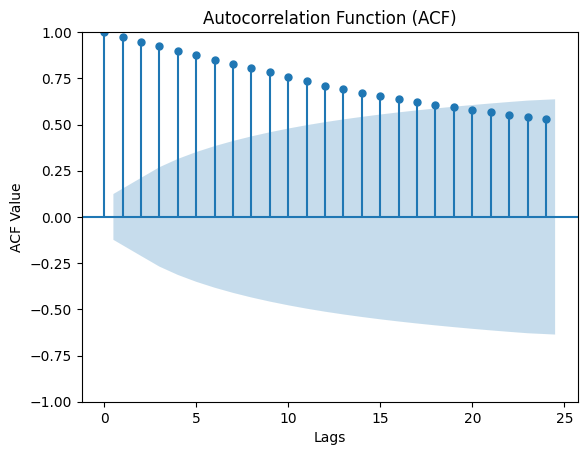

In [261]:
plot_acf(data['Close'])
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

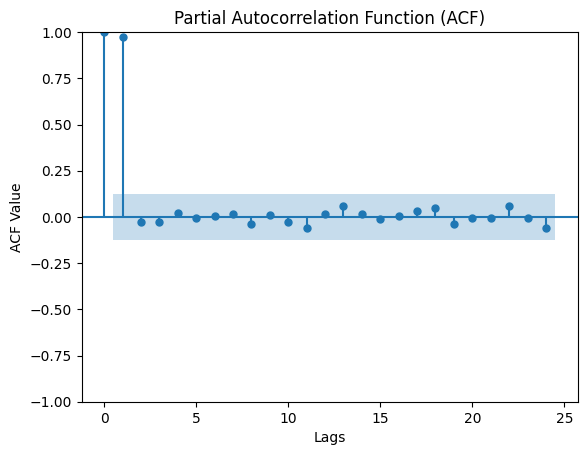

In [262]:
plot_pacf(data['Close'])
plt.title("Partial Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

Dickey-Fuller test

In [263]:
def dickey_fuller_test(time_series):
    result = adfuller(time_series)

    print('Dickey-Fuller Test Results:')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

dickey_fuller_test(data['Close'])

Dickey-Fuller Test Results:
Test Statistic: -2.5861110326138066
p-value: 0.09590194595133555
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876


KPSS test

In [264]:
def kpss_test(time_series):

    result = kpss(time_series)

    print('KPSS Test Results:')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'   {key}: {value}')
kpss_test(data['Close'])

#if the p-value is less than the significance level and the Test Statistic exceeds the Critical Values, the time series is likely non-stationary.
#Test Statistic: Indicates the computed test statistic value.
#p-value: Measures the significance level of the test. If p-value is less than the chosen significance level (e.g., 0.05), reject the null hypothesis of stationarity.
#Critical Values: Thresholds for comparison. If the Test Statistic exceeds these values, reject the null hypothesis.

KPSS Test Results:
Test Statistic: 1.7159551343844486
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-264-93ab8767af6b>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




Seasonal Decompose

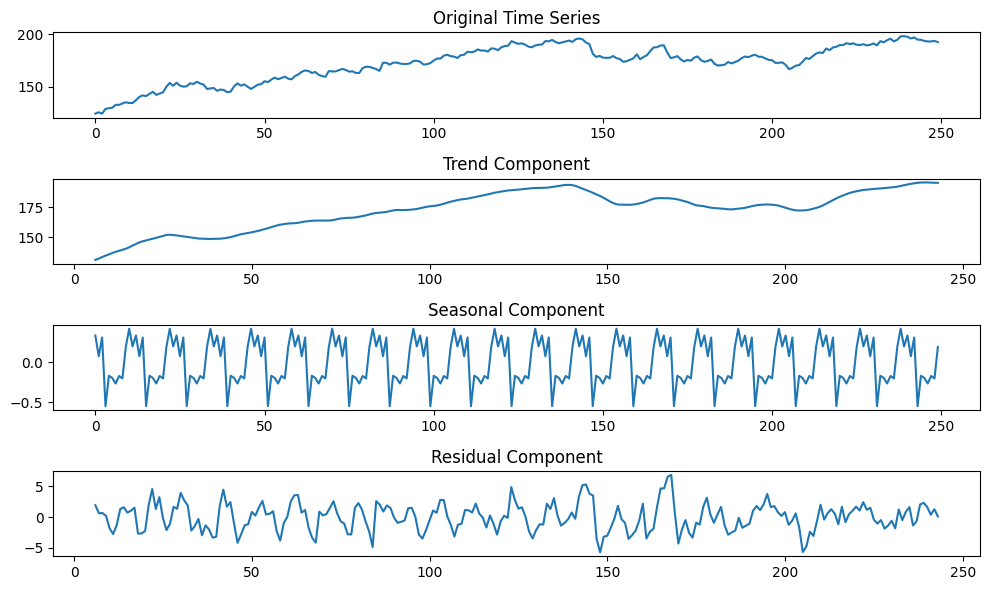

In [265]:
period = 12
# Perform seasonal decomposition with specified period
result = seasonal_decompose(data['Close'], model='additive', period=period)

# Plotting code remains the same
# ...
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(data['Close'])
plt.title('Original Time Series')

# trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

# seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

# residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')
plt.tight_layout()
plt.show()

Differencing(Eliminating Trend)

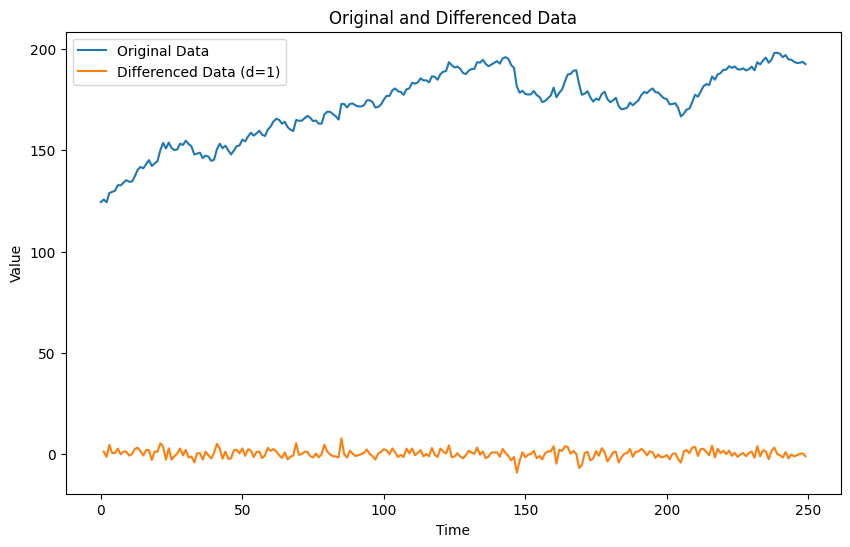

KPSS Test Results:
Test Statistic: 0.2560725802772843
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-264-93ab8767af6b>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [266]:
d = 1
time_data=data['Close']
differenced_data = time_data.diff(periods=d)
differenced_data = differenced_data.dropna()
plt.figure(figsize=(10, 6))
plt.plot(time_data, label='Original Data')
plt.plot(differenced_data, label='Differenced Data (d=1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original and Differenced Data')
plt.legend()
plt.show()

kpss_test(differenced_data)

#ARIMA Model

In [412]:
def arima(step):
    # Extract the closing prices from the DataFrame
    X = data['Close'].values

    # Use the entire dataset for training
    train = X

    # Initialize history with the training data
    history = [x for x in train]

    # Initialize an empty list to store predictions
    predictions = []

    # Fit the ARIMA model and make forecasts for the specified number of steps
    model = ARIMA(history, order=(1, 1, 18))
    model_fit = model.fit()
    output = model_fit.forecast(steps=step)

    # Extend the stock prices list with the forecasted values
    stock_price = list(data['Close'])
    print(stock_price)
    stock_price.extend(output)

    actual_values = data['Close'].values[-len(output):]  # Actual values for the forecasted period
    rmse = np.sqrt(mean_squared_error(actual_values, output))
    print("RMSE:", rmse)

    return stock_price


In [423]:
import warnings
warnings.filterwarnings("ignore")

def get_day_of_week(date):
    try:
        # Get the day of the week as an integer (Monday=0, Sunday=6)
        day_of_week = date.weekday()
        # Convert the integer day of the week to a string representation
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_name = days[day_of_week]
        return day_name
    except ValueError:
        return "Invalid date format. Please provide date in YYYY-MM-DD format."

def counting_weekdays(start_date, end_date):
    if get_day_of_week(end_date) == 'Saturday' or get_day_of_week(end_date) == 'Sunday':
        print("It's " + get_day_of_week(end_date)+"  , we can't buy Stocks")
        return 0
    else:
        present_date = start_date + timedelta(days=1)  # Start counting from the day after the start date
        no_of_week_days = 0
        while present_date < end_date:  # Stop before the end date
            if present_date.weekday() < 5:  # Monday to Friday (0 to 4)
                no_of_week_days += 1
            present_date += timedelta(days=1)
        return no_of_week_days, get_day_of_week(end_date)

given_date = datetime(2023, 12, 29)
last_date = datetime(2024, 1, 10)

no_of_week_days, day_of_week = counting_weekdays(given_date, last_date)

Arima_model = arima(no_of_week_days)
obj_new=Model()
values = obj_new.Maximizing_portfolio_value(Arima_model)

print("Predicted Values             :", Arima_model)
print("\n")
print("Maximized Porfolio Value     :", values[0][-1])
print("\n")
print("Transisition Distribution    :\n", values[2])
print("\n")
print("Buy_indices                  :\n", values[1])
print("\n")
print("Optimal Buy Dates            :", values[5])



[124.375, 125.658, 124.325, 128.9, 129.427, 130.003, 132.748, 132.668, 134.011, 135.184, 134.458, 134.518, 137.104, 140.326, 141.738, 141.071, 143.16, 145.119, 142.205, 143.488, 144.622, 149.982, 153.641, 150.887, 153.79, 151.076, 150.031, 150.4, 153.228, 152.581, 154.702, 153.089, 151.934, 147.88, 148.308, 148.796, 146.117, 147.322, 146.814, 144.723, 145.321, 150.42, 153.209, 150.988, 152.252, 149.982, 147.9, 149.862, 151.974, 152.372, 155.22, 154.374, 156.764, 158.636, 157.192, 158.288, 159.603, 157.641, 157.013, 160.12, 161.704, 164.234, 165.499, 164.961, 163.098, 163.995, 161.375, 160.15, 159.453, 164.891, 164.543, 164.562, 165.797, 166.953, 165.977, 164.353, 164.662, 163.108, 163.098, 167.73, 168.994, 168.905, 167.859, 166.773, 165.12, 172.869, 172.799, 171.076, 172.854, 173.048, 172.111, 171.612, 171.612, 172.23, 174.584, 174.694, 173.736, 171.103, 171.382, 172.529, 174.963, 176.828, 176.778, 179.611, 180.468, 179.102, 178.733, 177.347, 180.089, 180.478, 183.301, 182.822, 183.46,

In [408]:
data['Returns'] = returns

#Forcasting





In [276]:
timegpt = TimeGPT(
    token = 'Sfn4FPE4UxAWOUcXgGG5VlZ12jSnhGs2c3qazJurKDun733esDQXiiSIlZUrrGYd7IpPYr216EzaPH6GpKsmCN7yWKMyKAX9dS4meBkgTcRvDgybQjAmmAsBzMX8SwHUU7oyMpsDpXOLSNq59YJdhcQ1uV05Hnx9x1BPY2sfGMbgbq4MOdkpfScKXoZ675iBWZWi0j7bxllzxgHEPGskCfZm4ZSL2Tlyb38Xv3jpGxZB4WBWUUDzheBIk7soYhjE'
)

In [277]:
timegpt.validate_token()

True

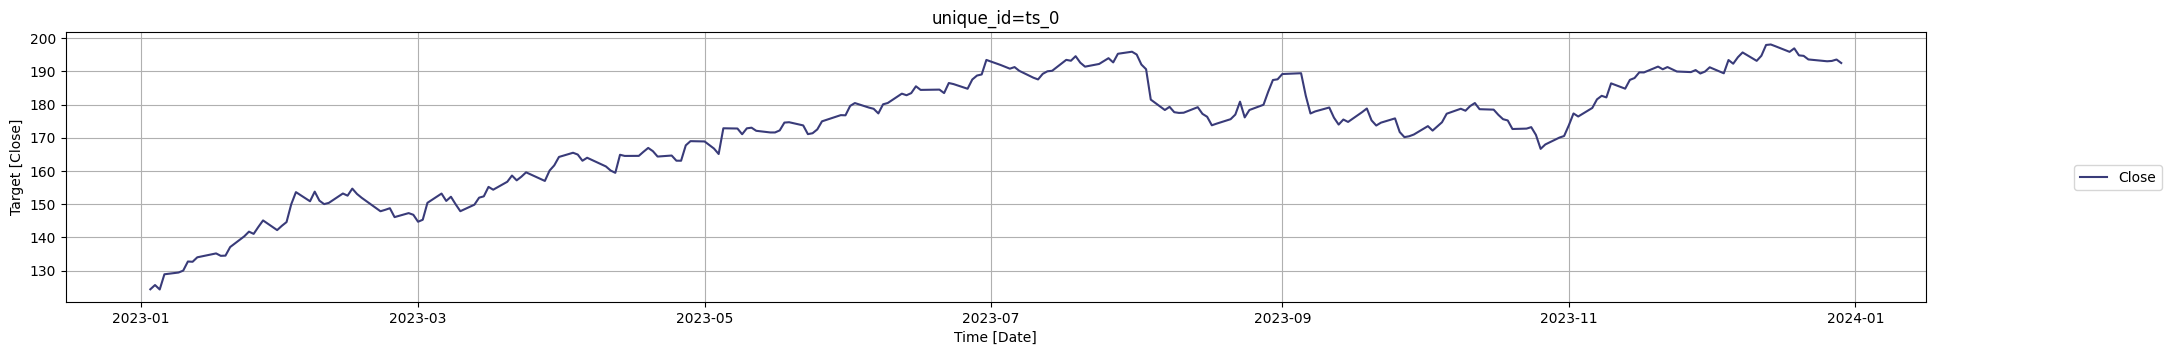

In [278]:
timegpt.plot(data, time_col='Date', target_col='Close')

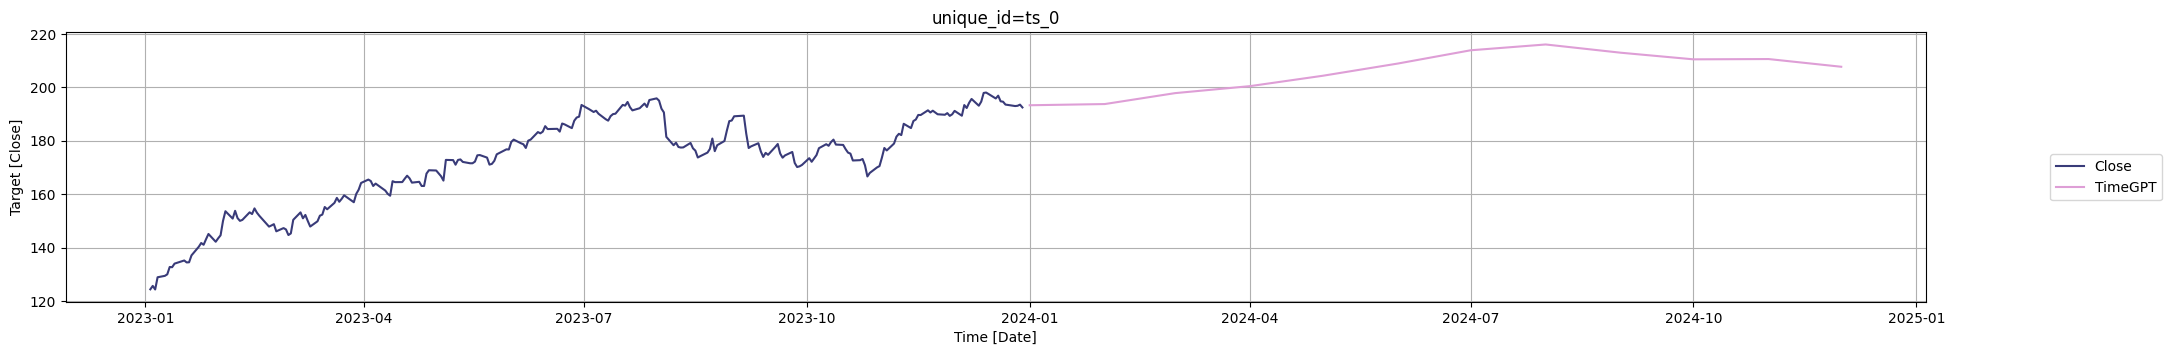

In [280]:
timegpt.plot(data, timegpt_fcst_df, time_col='Date', target_col='Close')

In [279]:
timegpt_fcst_df = timegpt.forecast(df=data, h=12, freq='MS', time_col='Date', target_col='Close')
timegpt_fcst_df.head()

,Date,TimeGPT
0,2024-01-01,193.347137
1,2024-02-01,193.798126
2,2024-03-01,197.887772
3,2024-04-01,200.519028
4,2024-05-01,204.400452
